In [2]:
import pandas as pd
import numpy as np
import requests
import json
import os


#replace the symbols 

def replace(x):
    try:
        f = float(x)
    except:
        f = 0.0
        
    return f   

In [3]:
urls=open('urls.json', 'r')
urls = json.load(urls)

#fetching all data into one dict 
tables = {}
for key in urls.keys():
    my_html = requests.get(urls[key]).content
    tables[key] = pd.read_html(my_html)
    
#replace non-numeric values
for key in tables.keys():
    for col in tables[key][1].columns:
        if 'Province' not in str(col):
            tables[key][1][col] = tables[key][1][col].apply(replace)
        else:
            pass
        
        
                

In [4]:
#reduce tables to keep only first two columns
new_tables = {}

for month in tables.keys():
    new_tables[month] = []
    for table in tables[month]:
        new_df = table[list(table.columns)[:2]]
        new_tables[month].append(new_df)

In [5]:
#test

new_tables['jan_2012'][1]

,Province,Volume
,Province,Jan. 2012
0,Newfoundland and Labrador,116.0
1,Bankruptcies,104.0
2,Proposals,12.0
3,Prince Edward Island,46.0
4,Bankruptcies,37.0
5,Proposals,9.0
6,Nova Scotia,292.0
7,Bankruptcies,238.0
8,Proposals,54.0


In [32]:
#get and concatenate all index 1 tables, for all months & years

table1 =[]

for month in list(new_tables.keys())[:-1]:
    
    table = new_tables[month][1]
    cols = list(table.columns)
    provinces = pd.Series(np.array(table[cols[0]]), name=cols[0][1])
    totals = pd.Series(np.array(table[cols[1]]), name=cols[1][1])
        
    

    month = pd.Series([totals.name[:3] for i in table.index], index=table.index, name='month')
    
    year = pd.Series([totals.name[-4:] for i in table.index], index=table.index, name='year')
    totals.name = 'totals'
    new_df = pd.concat([provinces, totals, month, year], axis=1)
    table1.append(new_df)
table1 = pd.concat(table1, axis=0).reset_index(drop=True)


In [47]:
#test
table1.head(5)

,Province,totals,month,year
0,Newfoundland and Labrador,116.0,Jan,2012
1,Bankruptcies,104.0,Jan,2012
2,Proposals,12.0,Jan,2012
3,Prince Edward Island,46.0,Jan,2012
4,Bankruptcies,37.0,Jan,2012


In [22]:
#test - see how table looks in excel 

table1.to_excel('table1.xlsx')

In [36]:
table1_grouped = table1.groupby(['Province','month'], as_index=False).totals
table1_grouped.describe()

#table1.Province.unique()


count                                            \
month                       Apr   Aug   Feb   Jan   Jul   Jun   Mar   May   
Province                                                                    
Alberta                     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bankruptcies               14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0   
British Columbia            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Canada                      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Manitoba                    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
New Brunswick               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Newfoundland and Labrador   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Northwest Territories       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Nova Scotia                 1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Nunavut                     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Ontario                     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Prince Edward Island        1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Proposals                  14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0   
Quebec                      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Saskatchewan                1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Yukon                       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                                       ...     max                           \
month                       Nov   Oct  ...     Aug      Feb     Jan     Jul   
Province                               ...                                    
Alberta                     1.0   1.0  ...   739.0    789.0   780.0   785.0   
Bankruptcies               14.0  14.0  ...  5893.0   6264.0  5420.0  5625.0   
British Columbia            1.0   1.0  ...   981.0   1077.0   871.0   963.0   
Canada                      1.0   1.0  ...  9746.0  10449.0  8944.0  9249.0   
Manitoba                    1.0   1.0  ...   145.0    155.0   142.0   140.0   
New Brunswick               1.0   1.0  ...   354.0    328.0   293.0   306.0   
Newfoundland and Labrador   1.0   1.0  ...   165.0    153.0   116.0   138.0   
Northwest Territories       1.0   1.0  ...     3.0      4.0     4.0     4.0   
Nova Scotia                 1.0   1.0  ...   357.0    391.0   292.0   345.0   
Nunavut                     1.0   1.0  ...     0.0      1.0     0.0     1.0   
Ontario                     1.0   1.0  ...  3857.0   4140.0  3496.0  3720.0   
Prince Edward Island        1.0   1.0  ...    44.0     51.0    46.0    60.0   
Proposals                  14.0  14.0  ...  3853.0   4185.0  3524.0  3624.0   
Quebec                      1.0   1.0  ...  2942.0   3214.0  2744.0  2646.0   
Saskatchewan                1.0   1.0  ...   156.0    144.0   158.0   137.0   
Yukon                       1.0   1.0  ...     3.0      2.0     2.0     4.0   

                                                                               
month                         Jun      Mar      May      Nov      Oct     Sep  
Province                                                                       
Alberta                     809.0    908.0    791.0    738.0    816.0   662.0  
Bankruptcies               5980.0   6551.0   6709.0   6063.0   6455.0  5538.0  
British Columbia           1004.0   1076.0   1053.0    924.0    990.0   862.0  
Canada                     9907.0  11020.0  10994.0  10232.0  10754.0  9055.0  
Manitoba                    158.0    165.0    175.0    179.0    151.0   171.0  
New Brunswick               346.0    377.0    360.0    312.0    316.0   304.0  
Newfoundland and Labrador   161.0    160.0    178.0    123.0    179.0   117.0  
Northwest Territories         3.0     10.0      1.0      2.0     11.0     2.0  
Nova Scotia                 370.0    401.0    411.0    382.0    380.0   308.0  
Nunavut                       0.0      0.0      0.0      0.0      1.0     0.0  
Ontario             

In [40]:
import matplotlib.pyplot as plt

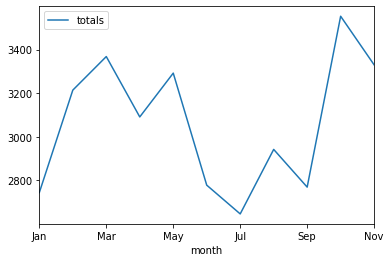

In [43]:
table1[table1.Province=='Quebec'].plot(kind='line', x='month', y='totals')
plt.show()

In [48]:
#get and concatenate all index 2 tables, for all months & years

table2 =[]

for month in list(new_tables.keys())[:-1]:
    
    table = new_tables[month][2]
    cols = list(table.columns)
    provinces = pd.Series(np.array(table[cols[0]]), name=cols[0][1])
    totals = pd.Series(np.array(table[cols[1]]), name=cols[1][1])
        
    

    month = pd.Series([totals.name[:3] for i in table.index], index=table.index, name='month')
    
    year = pd.Series([totals.name[-4:] for i in table.index], index=table.index, name='year')
    totals.name = 'totals'
    new_df = pd.concat([provinces, totals, month, year], axis=1)
    table2.append(new_df)
table2 = pd.concat(table2, axis=0).reset_index(drop=True)


In [49]:
#test 

table2.head(6)

,Province,totals,month,year
0,Newfoundland and Labrador,2,Jan,2012
1,Bankruptcies,2,Jan,2012
2,Proposals,0,Jan,2012
3,Prince Edward Island,3,Jan,2012
4,Bankruptcies,0,Jan,2012
5,Proposals,3,Jan,2012


In [ ]:
#tomorrow 

-> figure out how to separate proposals from bankruptcies (e.g. bc bankruptcies, ontario bankruptcies, etc)
-> plot combined timeseries graph, with bankruptcies and proposals combined 
